<a target="_blank" href="https://colab.research.google.com/github/ginal001/ML-2024-2025/blob/main/Lab2/Homework02.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# **Homework Assignment: EM Clustering in 2D**
-------------------------------

You have seen how the **Expectation-Maximization (EM)** algorithm can fit a Gaussian Mixture Model (GMM) to a 2D dataset. You should now explore:

## **Primary Question**

**How can we visualize the *decision boundary* for attributing a *new* (unlabeled) point to one of the GMM clusters?**  

In other words, given a 2D data distribution modeled by EM, think of a way to clearly show (on a plot) *which* cluster a point would be assigned to (or which cluster has the highest responsibility (posterior probability) for that point)?  

The plot should comprehensively cover the entire visible region, ensuring that for any point on the plot, it is immediately evident which cluster it would belong to. You can plot **lines** separating clusters or use a **color map** showing each point's "most likely cluster".

You can illustrate your approach with **the same** 2D dataset that we used in class, or you can find another suitable 2D dataset, it's up to you. Note however, that having 3 clusters enhances the clarity of the visualization—while 2 clusters result in overly simple boundaries, using 4 or more clusters can make the entire plot difficult to interpret. Try to choose a dataset with 3 clusters.

Discuss any irregularities observed in the resulting plot. If a decision boundary suggests that a region should be attributed to a cluster in a counterintuitive way (we saw it in class!), provide an explanation for why this might occur. It may be also an indication you have a bug in your code.

## **Secondary Question**

**If we *didn't know* the number of clusters in advance, how could we decide on a suitable $K$ for the clustering algorithm?**  

You can illustrate your approach with **the same** dataset as in the primary question by trying different values of $K$ (and optionally plotting the evaluation metric values, e.g. silhouette scores, etc.). Or you can find another suitable dataset, it's up to you. Note, that the dataset doesn't need to be 2D in this task.

## **Task & Deliverables**

1. **Colab Notebook**  
   - Create a **Colab notebook** that:
     - Clearly **answers** both the **primary** and **secondary** questions with appropriate plots and short explanations.
     - Uses Python code (e.g. `scikit-learn` for GMM) to visualize:
       1. The **data** and **cluster assignments**.
       2. The **decision boundary** (lines or a color map) indicating each cluster's region.
       3. A demonstration (chart or table) of how you would pick a suitable number of clusters $K$ when it is not known.
   - Remember to use the `$` symbol to delimit **inline equations** and `$$` to delimit **full-line equations**.

2. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.



# Solution 

First of all, we are going to create data from gaussian mixture. We will use the same distribution as in classes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

np.random.seed(0)  # for reproducibility

# 1) 300 points from N([0, 0], [[0.16, 0],[0, 0.16]])
mean1 = np.array([0.0, 0.0])
cov1 = np.array([[0.16, 0.0],
                 [0.0,  0.16]])
data1 = np.random.multivariate_normal(mean1, cov1, 300)

# 2) 100 points from N([0.8, 0.8], [[0.04, 0],[0, 0.04]])
mean2 = np.array([0.8, 0.8])
cov2 = np.array([[0.04, 0.0],
                 [0.0,  0.04]])
data2 = np.random.multivariate_normal(mean2, cov2, 100)

# 3) 100 points from N([-0.8, 0.8], [[0.04, 0],[0, 0.04]])
mean3 = np.array([-0.8, 0.8])
cov3 = np.array([[0.04, 0.0],
                 [0.0,  0.04]])
data3 = np.random.multivariate_normal(mean3, cov3, 100)

# Combine all data
X = np.vstack([data1, data2, data3])
N, d = X.shape  # should be (500, 2)

# Add response variable
response = np.array(300*[0] + 100*[1] + 100*[2])

Now, we are going to use EM algorithm for gaussian mixture, implemented in scikit-learn. Then, we plot decision boundary by creating full grid of points and assigning them the most probable cluster.

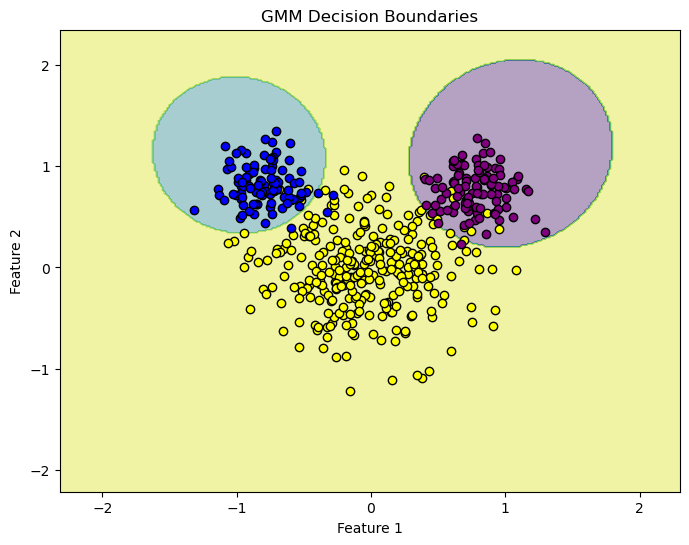

In [2]:
# Fit gaussian mixture
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(X)

# Create grid
x = np.linspace(X[:,0].min() - 1, X[:,0].max() + 1, 300)
y = np.linspace(X[:,1].min() - 1, X[:,1].max() + 1, 300)
xx, yy = np.meshgrid(x, y)
grid = np.c_[xx.ravel(), yy.ravel()]

# Compute posterior probabilities (responsibilities)
responsibilities = gmm.predict_proba(grid)
cluster_assignments = responsibilities.argmax(axis=1)

# Plot decision boundaries using a color map
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, cluster_assignments.reshape(xx.shape), alpha=0.4, cmap='viridis')

# Overlay original data points
plt.scatter(X[response == 0,0], X[response == 0,1], c='yellow', edgecolor='k')
plt.scatter(X[response == 1,0], X[response == 1,1], c='purple', edgecolor='k')
plt.scatter(X[response == 2,0], X[response == 2,1], c='blue', edgecolor='k')
plt.title('GMM Decision Boundaries')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

The color of each point indicates the Gaussian distribution from which it was generated, while the color of the plane represents the decision boundary.

Let's find suitable K for clustering (assuming that we do not know that k = 3). We will use 3 criterions: silhoutte score, BIC and AIC. In the next chunk we fit 9 models and then we store BIC, AIC and silhoutte score.

In [3]:
from sklearn.metrics import silhouette_score

sil_scores = []
bic_scores = []
aic_scores = []
k_values = range(2, 11)

for k in k_values:
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
    gmm.fit(X)
    labels = gmm.predict(X)
    sil_scores.append(silhouette_score(X, labels))
    bic_scores.append(gmm.bic(X))
    aic_scores.append(gmm.aic(X))

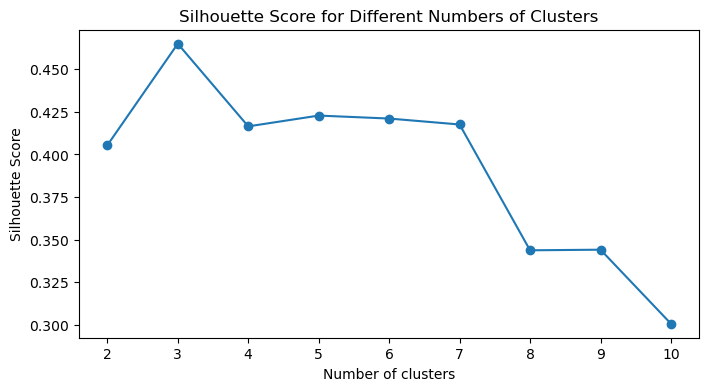

In [4]:
plt.figure(figsize=(8, 4))
plt.plot(k_values, sil_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

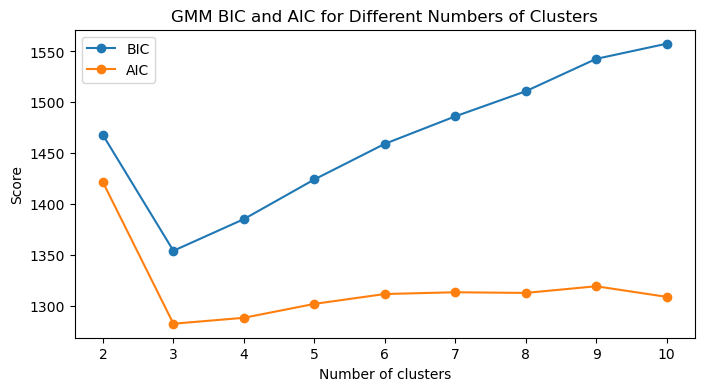

In [5]:
plt.figure(figsize=(8, 4))
plt.plot(k_values, bic_scores, label='BIC', marker='o')
plt.plot(k_values, aic_scores, label='AIC', marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.title('GMM BIC and AIC for Different Numbers of Clusters')
plt.legend()
plt.show()

We can use one of three critierions. We choose model with the lowest BIC or AIC and we can choose model with the highest silhoutte score. In all cases, the best model is this one with k = 3. 

# Answers for questions 

**# 1** We can visualise the decision boundary by fitting model and then using it to assign points to clusters from grid. We color the assignments and we have clear illustration of decision boundaries (as done in notebook).

We can also easily explain why one of clusters is unbounded. Estimated covariance matrix of this one has the largest positive eigenvalues and the log likelihood will dominates others as |x| approaches to $\infty$ (since log likelihood of belonging to cluster depends on negative distance from mean of cluster scaled by inversed covariance matrix).

**# 2** We can compare models by using metrics. The most popular one for clustering techniques is silhoutte score which assesses the balance between cluster compactness and separation. We can also use more general metrics as BIC and AIC (which are statistical criteria used to evaluate and compare models by balancing model fit and complexity).